### Importing the necessary libraries

#### Necessary imports for time series analysis and forecasting using python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import skew
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Loading the data

In [2]:
exchange_rates_df = pd.read_csv('/Users/eshasali/Desktop/BOE-XUDLERD.csv')
exchange_rates_df

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608
...,...,...
10832,1975-01-08,0.7554
10833,1975-01-07,0.7510
10834,1975-01-06,0.7524
10835,1975-01-03,0.7585


## Exploratory Data Analysis - EDA

#### Understanding the characteristics of the data

#### Checking the number of rows and columns

In [3]:
exchange_rates_df.shape

(10837, 2)

#### Checking the statistical characteristics of the data

In [4]:
exchange_rates_df.describe()

,Value
count,10837.000000
mean,0.864988
std,0.153289
min,0.626000
25%,0.759800
50%,0.826300
75%,0.920300
max,1.551900


#### Checking for nans and null values

In [5]:
exchange_rates_df.isna().sum()

Date     0
Value    0
dtype: int64

In [6]:
exchange_rates_df.isnull().sum()

Date     0
Value    0
dtype: int64

#### Checking the data types

In [7]:
exchange_rates_df.dtypes

Date      object
Value    float64
dtype: object

#### Checking the skewness of the numeric column

#### The skewness measures asymmetry of the data distribution. If the value is close to zero it indicates a relatively symmetric distribution


In [8]:
skewness = skew(exchange_rates_df['Value'])
print(f"Skewness: {skewness}")

Skewness: 1.4126747671406659


### Data Preprocessing

In [9]:
exchange_rates_df

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608
...,...,...
10832,1975-01-08,0.7554
10833,1975-01-07,0.7510
10834,1975-01-06,0.7524
10835,1975-01-03,0.7585


#### Converting the 'Date' column to datetime

In [10]:
exchange_rates_df['Date'] = pd.to_datetime(exchange_rates_df['Date'])
exchange_rates_df

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608
...,...,...
10832,1975-01-08,0.7554
10833,1975-01-07,0.7510
10834,1975-01-06,0.7524
10835,1975-01-03,0.7585


#### Setting Date column as the index

In [11]:
exchange_rates_df.set_index('Date', inplace=True)
exchange_rates_df

,Value
Date,
2017-11-09,0.8603
2017-11-08,0.8631
2017-11-07,0.8639
2017-11-06,0.8631
2017-11-03,0.8608
...,...
1975-01-08,0.7554
1975-01-07,0.7510
1975-01-06,0.7524


### Data Visualization

Visualizing the exchange rates of Euro to USD over time. This visualization serves to provide a quick, visual understanding of how the foreign exchange rates fluctuate over the specified time period.

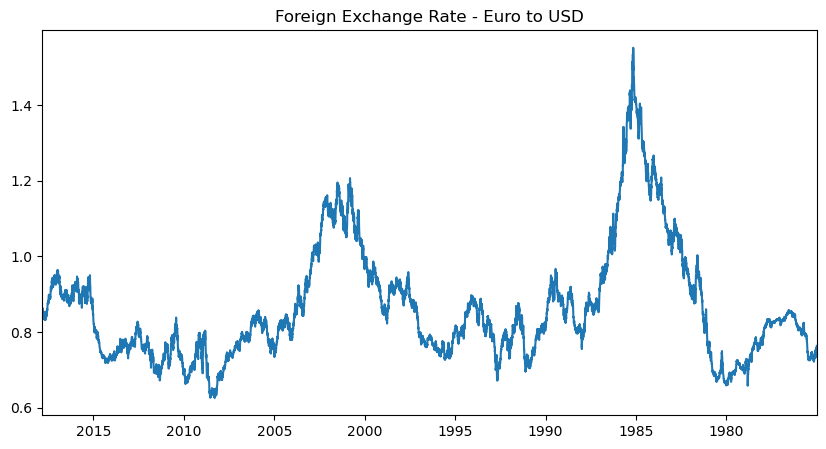

In [12]:
plt.figure(figsize=(10,5))
plt.plot(exchange_rates_df)
plt.title('Foreign Exchange Rate - Euro to USD')
plt.xlim(exchange_rates_df.index[0], exchange_rates_df.index[-1])
plt.savefig('Plot 1: Foreign Exchange Rate - Euro to USD')
plt.show()

### Weekly Resampling for Efficient Modeling

To enhance the efficiency of model fitting and prediction, the dataset is resampled to a weekly frequency. This adjustment is made due to the higher number of observations in the given data, which can extend the time required for model operations. After resampling, the first five records of the resampled dataset are presented.


In [13]:
weekly_ex_rate_df = exchange_rates_df.resample('W').mean()
weekly_ex_rate_df.head()

,Value
Date,
1975-01-05,0.76090
1975-01-12,0.75346
1975-01-19,0.75546
1975-01-26,0.74388
1975-02-02,0.73902


#### Line Graph for Weekly Resampled Data Trend

A line graph is generated to visually represent the trend in the weekly resampled dataset to provide insights into the data patterns over time.


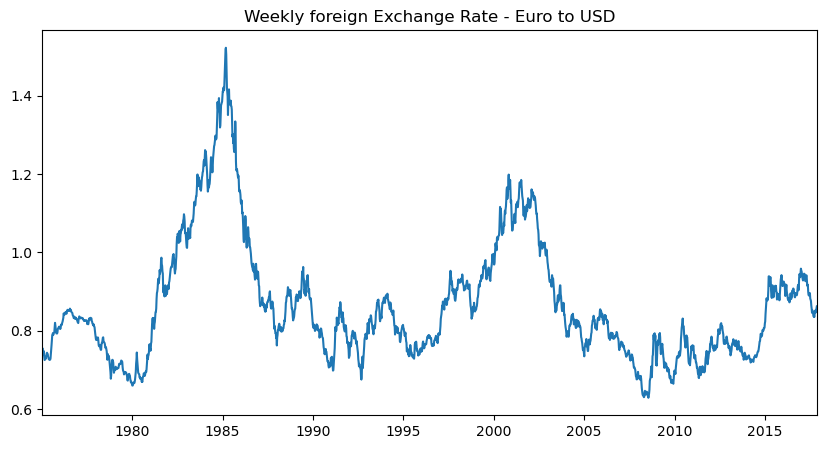

In [14]:
plt.figure(figsize=(10,5))
plt.plot(weekly_ex_rate_df)
plt.title('Weekly foreign Exchange Rate - Euro to USD')
plt.xlim(weekly_ex_rate_df.index[0], weekly_ex_rate_df.index[-1])
plt.savefig('Plot 2: Weekly Exchange Rate - Euro to USD')
plt.show()

### Monthly Resampling for Efficient Modeling

To enhance the efficiency of model fitting and prediction, the dataset is resampled to a monthly frequency. This adjustment is made due to the higher number of observations in the given data, which can extend the time required for model operations. After resampling, the first five records of the resampled dataset are presented.


In [15]:
monthly_ex_rate_df = exchange_rates_df.resample('M').mean()
monthly_ex_rate_df.head()

,Value
Date,
1975-01-31,0.749132
1975-02-28,0.737910
1975-03-31,0.730337
1975-04-30,0.741623
1975-05-31,0.731286


#### Line Graph for Weekly Resampled Data Trend

A line graph is generated to visually represent the trend in the monthly resampled dataset to provide insights into the data patterns over time.


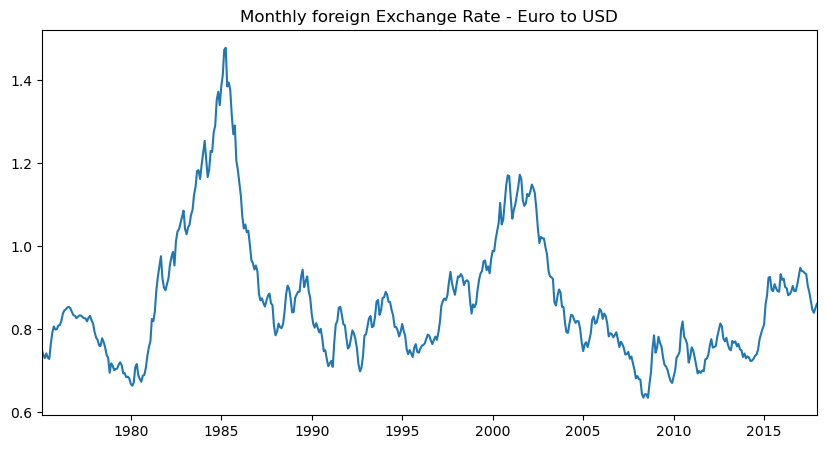

In [16]:
plt.figure(figsize=(10,5))
plt.plot(monthly_ex_rate_df)
plt.title('Monthly foreign Exchange Rate - Euro to USD')
plt.xlim(monthly_ex_rate_df.index[0], monthly_ex_rate_df.index[-1])
plt.savefig('Plot 3: Monthly foreign Exchange Rate - Euro to USD')
plt.show()

### Yearly Resampling for Efficient Modeling

To enhance the efficiency of model fitting and prediction, the dataset is resampled to a yearly frequency. This adjustment is made due to the higher number of observations in the given data, which can extend the time required for model operations. After resampling, the first five records of the resampled dataset are presented.


In [17]:
yearly_ex_rate_df = exchange_rates_df.resample('Y').mean()
yearly_ex_rate_df.head()

,Value
Date,
1975-12-31,0.766268
1976-12-31,0.837672
1977-12-31,0.823871
1978-12-31,0.747492
1979-12-31,0.697025


#### Line Graph for Weekly Resampled Data Trend

A line graph is generated to visually represent the trend in the yearly resampled dataset to provide insights into the data patterns over time.


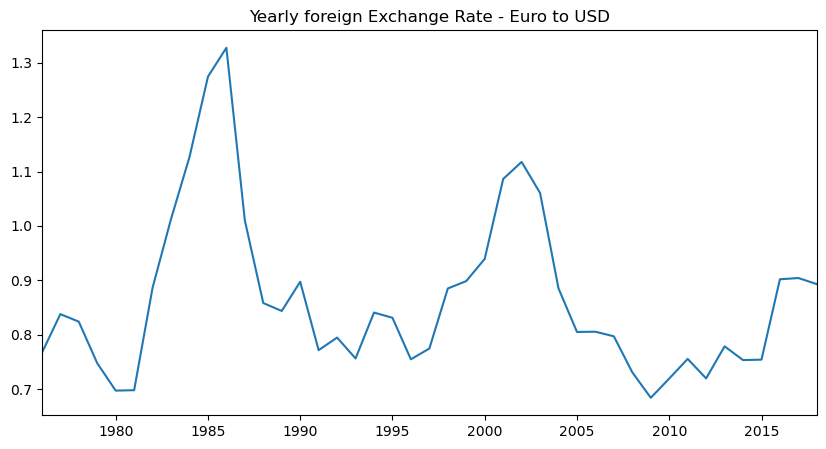

In [18]:
plt.figure(figsize=(10,5))
plt.plot(yearly_ex_rate_df)
plt.title('Yearly foreign Exchange Rate - Euro to USD')
plt.xlim(yearly_ex_rate_df.index[0], yearly_ex_rate_df.index[-1])
plt.savefig('Plot 4: Yearly foreign Exchange Rate - Euro to USD')
plt.show()

#### Plotting the histogram distribution of of EUR-USD exchange rates

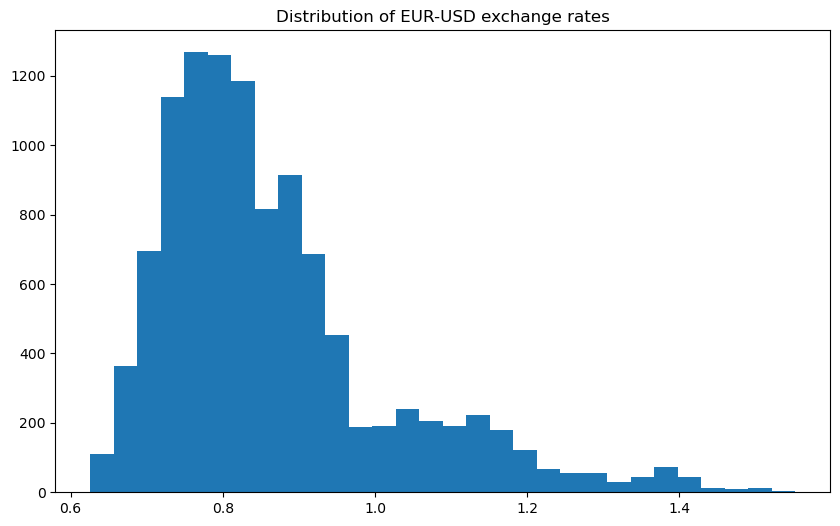

In [19]:
exchange_rates_df = exchange_rates_df.sort_values(by='Value')

plt.figure(figsize=(10, 6))
plt.hist(exchange_rates_df,bins=30)
plt.title("Distribution of EUR-USD exchange rates")
plt.savefig('Plot 5: Distribution of EUR-USD exchange rates')

plt.show()

#### Plotting a scatter plot to illustrate the trend in the weekly resampled dataset. 

This visualization offers insights into the patterns present in the data over time. Upon observing all the resampled graphs, it becomes evident that the weekly resampled data exhibits clearer peaks and patterns compared to other resampled datasets.





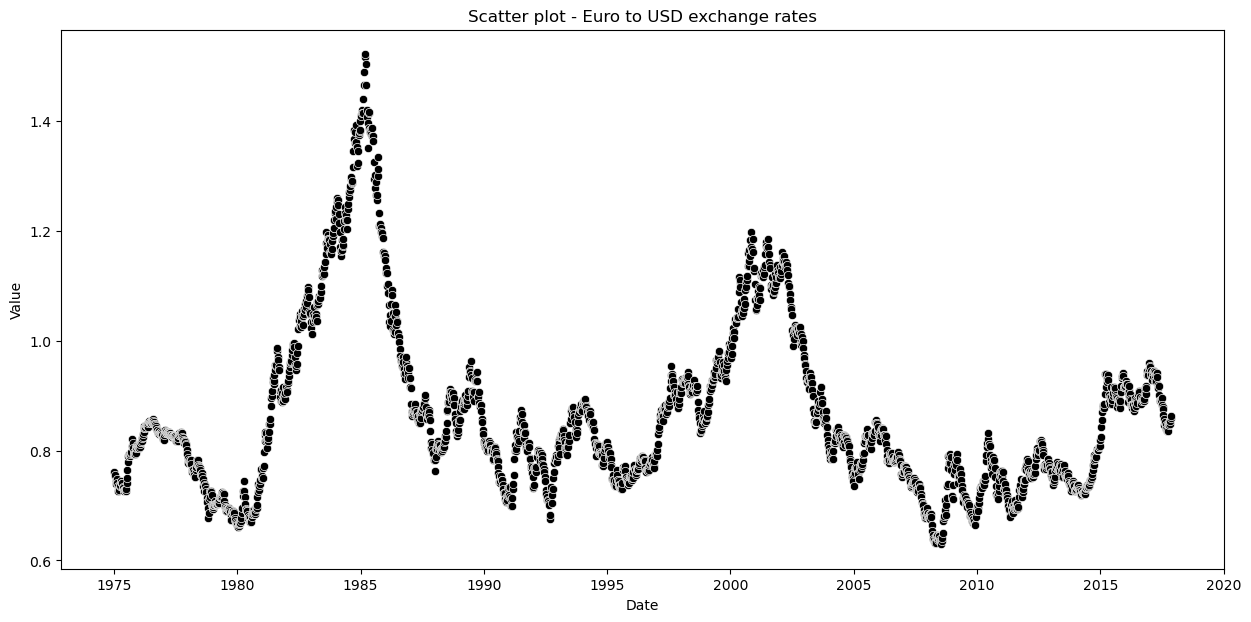

In [20]:
weekly_ex_rate_df = weekly_ex_rate_df.sort_index()
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x= weekly_ex_rate_df.index,y=weekly_ex_rate_df['Value'], color='black')
plt.title('Scatter plot - Euro to USD exchange rates')
plt.savefig('Plot 6: Scatter plot - Euro to USD exchange rates')
plt.show()

#### Plotting the histogram along with the kde plot using seaborn library depicting the data distribution in the weekly resampled dataset.

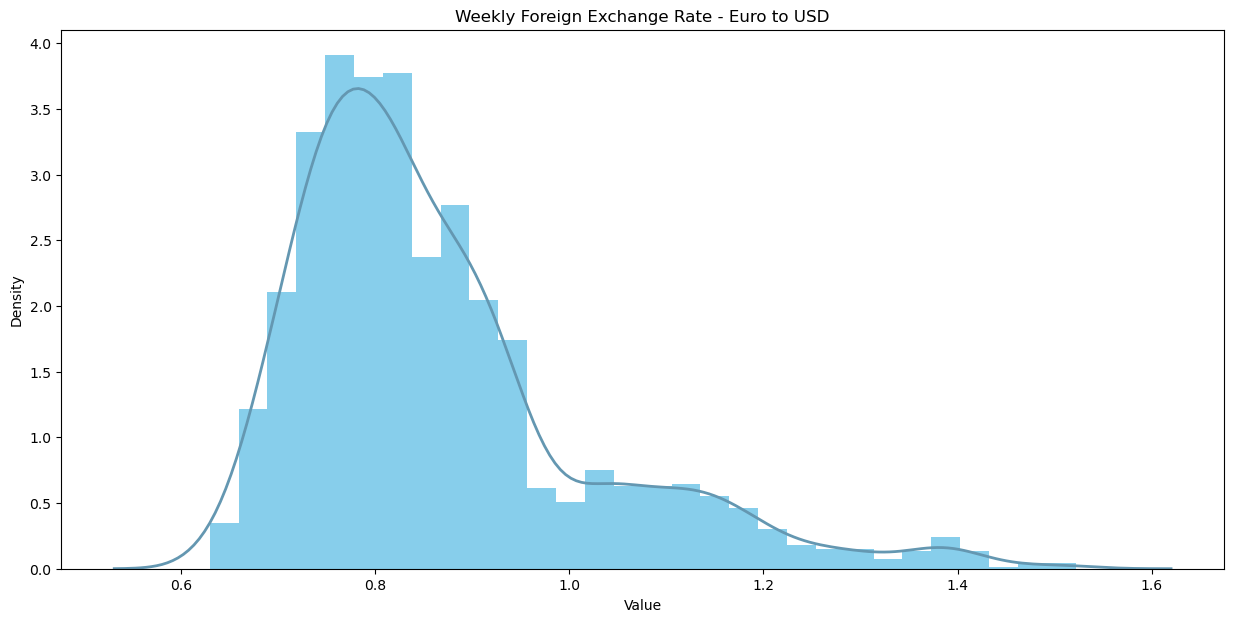

In [21]:
plt.hist(weekly_ex_rate_df['Value'], bins=30, density=True, color='skyblue')
sns.kdeplot(weekly_ex_rate_df['Value'], color='#6497b1', linewidth=2)
plt.title('Weekly Foreign Exchange Rate - Euro to USD')
plt.xlabel('Value')
plt.ylabel('Density')
plt.savefig('Plot 7: Histogram of Euro to USD.png')
plt.show()

#### Plotting a histogram and Kernel Density Estimate (KDE) line plot to visualize the dataset's distribution

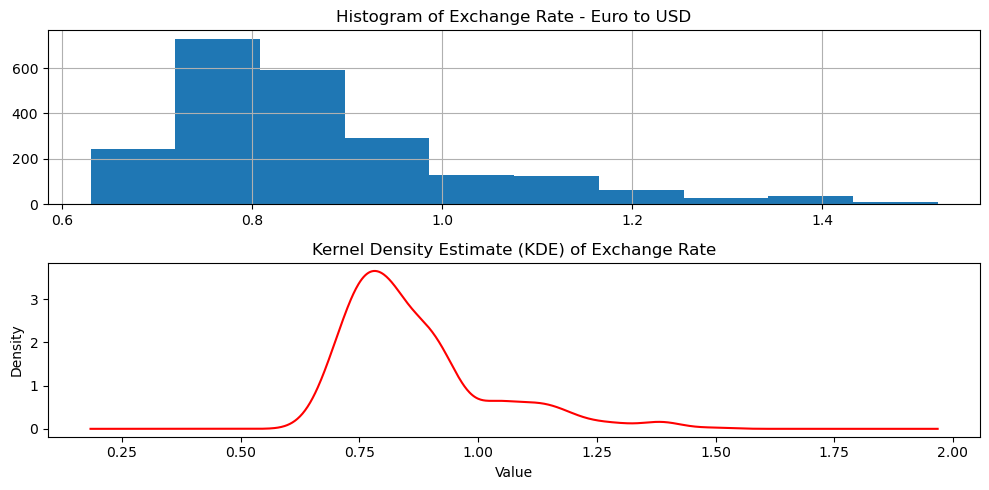

In [22]:
weekly_ex_rate_df = weekly_ex_rate_df.sort_index()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10, 5))
weekly_ex_rate_df['Value'].hist(ax=ax1)
weekly_ex_rate_df['Value'].plot(kind='kde', ax=ax2, c='r')

ax1.set_title('Histogram of Exchange Rate - Euro to USD')
ax2.set_title('Kernel Density Estimate (KDE) of Exchange Rate')

# Set common xlabel for both subplots
plt.xlabel('Value')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.savefig('Plot 8: Histogram and KDE of Euro to USD.png')
plt.show()

#### Plotting a graph using the Seasonal Decomposition function to illustrate data description, trend, seasonal patterns, and residuals.

Seasonal decomposition is a technique used in time series analysis to disentangle the various components of a time series, providing a clearer understanding of its underlying structure. This method is particularly valuable when dealing with time series data that exhibits recurring patterns or seasonality.

#### Trend Component:

The trend component represents the overall direction or long-term movement of the time series that is it identifies the underlying pattern that is not associated with short-term fluctuations.

#### Seasonal Component:

The seasonal component captures regular patterns that repeat at fixed intervals this could be daily, monthly, quarterly, or any other recurring pattern within the data. Identifying and understanding seasonality helps forecasting future values accurately.

#### Residuals Component:

Residuals are also known as errors, they account for the random fluctuations or noise in the data that cannot be explained by the trend or seasonal components. Analyzing residuals helps identify any remaining patterns or irregularities.

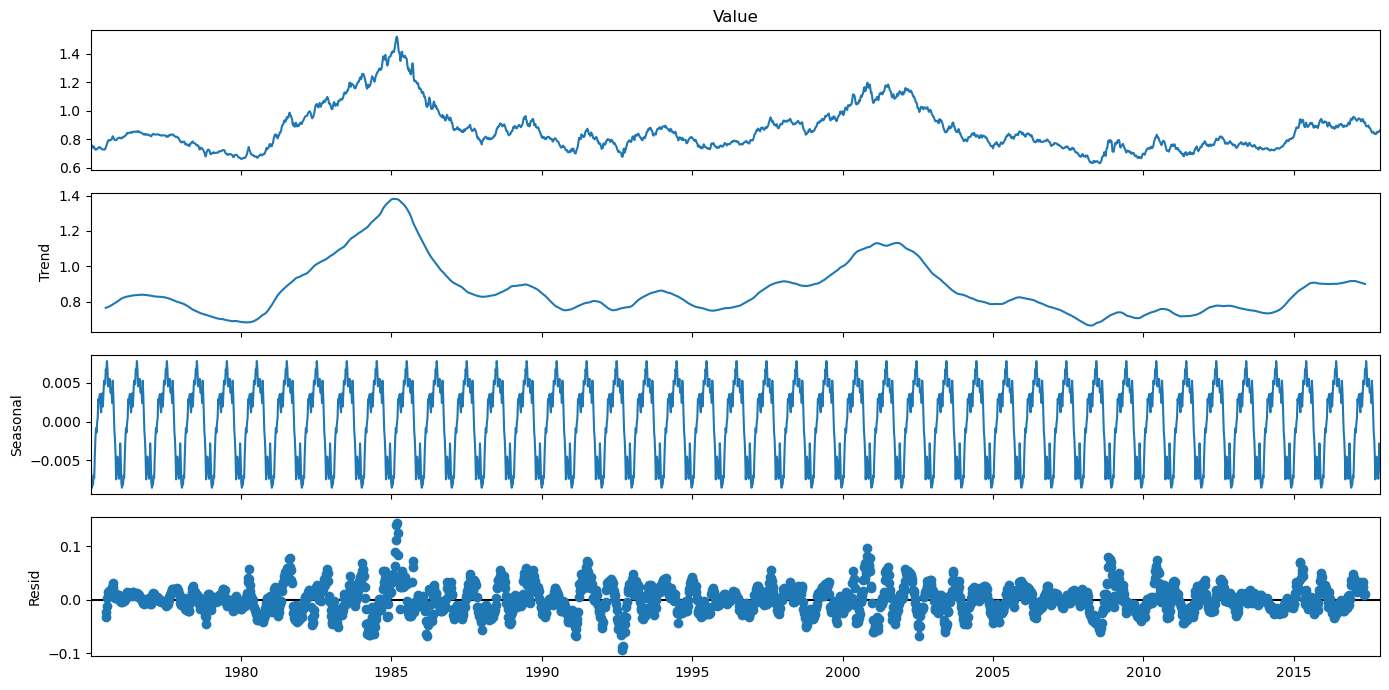

In [23]:
plt.rcParams['figure.figsize'] = (14, 7)
decomposition = seasonal_decompose(weekly_ex_rate_df['Value'], period=52, model='additive')
decomposition.plot()
plt.savefig('Plot 9: Description, Trend, Seasonal, Residuals.png')
plt.show()

#### Plotting a graph to visualize the autocorrelation and correlation.

#### Auto Correlation (ACF):

ACF measures the correlation between a time series and its lagged values. It helps identify patterns and dependencies in the data at different time lags. Peaks in the ACF plot indicate potential correlations.

#### Partial Auto Correlation (PACF):

PACF measures the correlation between a time series and its lagged values while controlling for the effect of other lags. It helps discern the direct relationship between the time series and specific lagged observations. Significant spikes in the PACF plot highlight influential lags.

In the graph, auto-correlation looks high for >1 lagged signals versions, the partial auto-correlations make it clear that only the 1-lagged signal version is the most informative signal – everything else doesn’t add as much value. This important distinction is why the partial auto-correlation plots are important in addition to the auto-correlation plots.


<Figure size 1200x600 with 0 Axes>

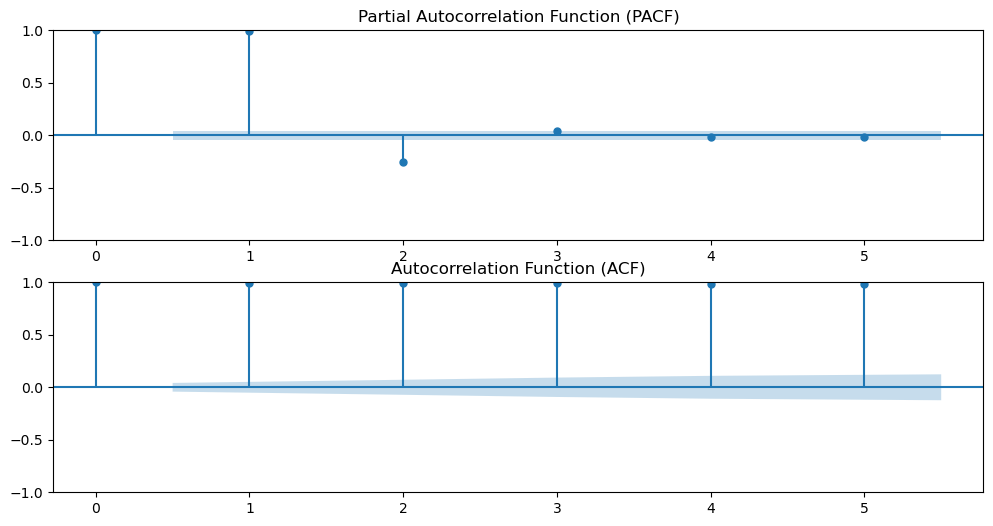

In [24]:
weekly_ex_rate_df = weekly_ex_rate_df.sort_index()

plt.figure(figsize=(12, 6))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12, 6))

sm.graphics.tsa.plot_pacf(weekly_ex_rate_df['Value'], lags=5, ax=ax1)

sm.graphics.tsa.plot_acf(weekly_ex_rate_df['Value'], lags=5, ax=ax2)

ax1.set_title('Partial Autocorrelation Function (PACF)')
ax2.set_title('Autocorrelation Function (ACF)')

plt.savefig('Plot 10: Partial Autocorrelation and Autocorrelation.png')

plt.show()


## Data Transformation

####  Augmented Dickey-Fuller test 

The `adf_check()` function conducts an Augmented Dickey-Fuller test on a given time series. This test is instrumental in assessing the stationarity of a time series. The key criterion for stationarity determination is the p-value. If the p-value is less than or equal to 0.05, there exists strong evidence against the null hypothesis, indicating that the series is stationary. Conversely, if the p-value exceeds 0.05, the null hypothesis is accepted, signifying that the series is non-stationary.

Upon conducting the Augmented Dickey-Fuller test on the given time series, the observed p-value stands at 25.41%. This value is pivotal in determining whether to retain the null hypothesis or reject it in favor of the alternative hypothesis.

#### Null Hypothesis (H₀):
The null hypothesis typically assumes the presence of a unit root in the time series, indicating non-stationarity. This unit root suggests that the series doesn't stay the same, it changes and doesn't have a stable, unchanging pattern. So, assuming the null hypothesis we consider the possibility that our time series is not stationary, and it might have trends or patterns that vary over time.

#### Alternative Hypothesis (H₁):
The alternative hypothesis suggests the absence of a unit root, implying stationarity. This unit root suggests that the series will stay the same, it does not change and has a stable, unchanging pattern. So, assuming the null hypothesis we consider the possibility that our time series is stationary, and it does not have trends or patterns that vary over time.


#### P-Value Analysis:
A p-value of 25.41% indicates that we retain the null hypothesis. This suggests that there is insufficient evidence to conclude that the time series is stationary. 

#### Interpretation:
With the observed p-value, we refrain from rejecting the null hypothesis. Therefore, the time series signal is not considered stationary based on this test.

Therefore, we can understand the trend and seasonality using the Augmented Dickey-Fuller test. This contributes to the reliability of forecasting models by ensuring that the time series exhibits consistent statistical properties over time.

In [25]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_check(time_series):
    result = adfuller(time_series, autolag='AIC')

    # Create a pandas Series for result interpretation
    label = pd.Series(result[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])

    # Add critical values to the Series
    for key, value in result[4].items():
        label[f'Critical Value ({key})'] = value

    # Print the results
    print(label)

    # Check for stationarity based on p-value
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis, and the series is Stationary')
    else:
        print('As the p-value is 25.4% we have a weak evidence against the null hypothesis, hence we ACCEPT null hypothesis, and the series is Not Stationary')


adf_check(weekly_ex_rate_df['Value'])


Test Statistic                   -2.076341
p-value                           0.254134
Number of Lags Used               2.000000
Number of Observations Used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64
As the p-value is 25.4% we have a weak evidence against the null hypothesis, hence we ACCEPT null hypothesis, and the series is Not Stationary


#### Taking the weekly first difference
As the original time series is non-stationary, a new dataframe is created by taking the first difference of the resampled weekly dataset. This transformation aims to convert the data into a stationary series. The new dataframe is presented with information on the number of observations and the initial five records.

In [26]:
week_df = weekly_ex_rate_df.diff().dropna()
print('Count of weekly First Difference',week_df.shape[0])
week_df.head()

Count of weekly First Difference 2236


,Value
Date,
1975-01-12,-0.00744
1975-01-19,0.00200
1975-01-26,-0.01158
1975-02-02,-0.00486
1975-02-09,0.01004


#### adf_check on transformed data 
Conducting the Augmented Dickey Fuller Test on the transformed data within the resampled weekly dataset to determine its stationarity.

In [27]:
adf_check(week_df['Value'])

Test Statistic                  -30.128987
p-value                           0.000000
Number of Lags Used               1.000000
Number of Observations Used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis, and the series is Stationary


#### Plotting the graph for transformed data - (based on weekly first difference)

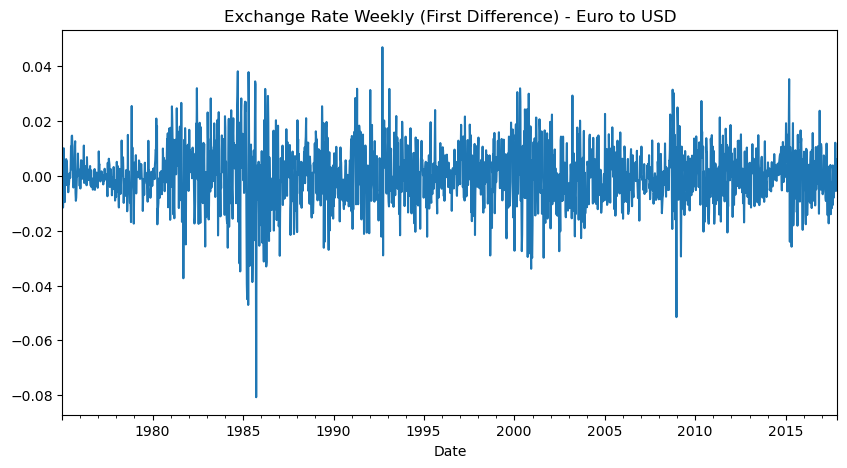

In [28]:
week_df['Value'].plot(figsize = (10,5))
plt.title('Exchange Rate Weekly (First Difference) - Euro to USD')
plt.savefig('Plot 11: Exchange Rate Weekly(First Difference) - Euro to USD.png')
plt.show()

#### Plotting a graph using the pandas autocorrelation plot to highlight distinctions between stationary and non-stationary data. 

The autocorrelation plots offer valuable insights in analysis and forecasting, aiding in the prediction of future rates. By observing these graphs, one can discern patterns of correlation between current and past values. This is crucial for identifying potential trends and making informed predictions about future trends or fluctuations in the time series.

Correlation between two signals can give us information about the degree to which the two signals depend on each other, linearly.

Here, if the auto-correlation of a signal (with it’s lagged version) is high, then we know that the future values of a signal are considerably dependent on the past values. That’s exactly what the correlation plots convey to us. Partial correlations allow us to understand the effects of different lags independently.

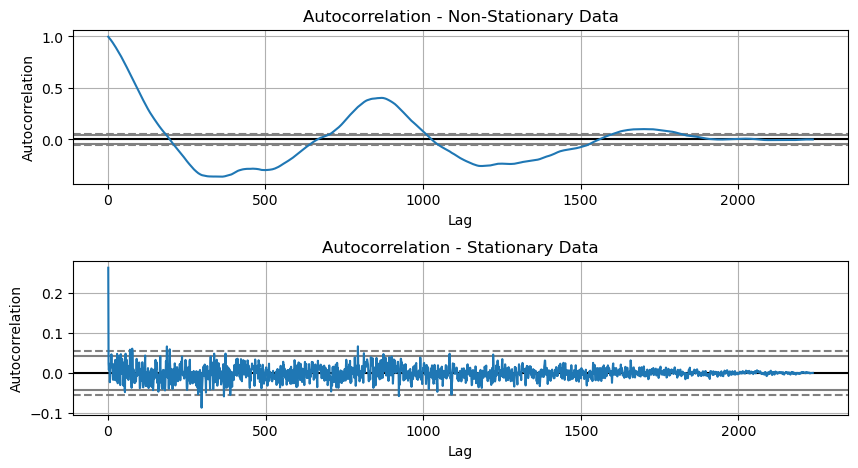

In [29]:
def plot_autocorrelation(data, ax, title):
    autocorrelation_plot(data, ax=ax)
    ax.set_title(title)

weekly_ex_rate_df = weekly_ex_rate_df.sort_index()
week_df = week_df.sort_index()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(10, 5))

# Plot autocorrelation for non-stationary data
plot_autocorrelation(weekly_ex_rate_df['Value'], ax1, 'Autocorrelation - Non-Stationary Data')

# Plot autocorrelation for stationary data
plot_autocorrelation(week_df['Value'], ax2, 'Autocorrelation - Stationary Data')

plt.subplots_adjust(hspace=0.5)

plt.savefig('Plot 12: Stationary data and Non-Stationary data.png')

plt.show()


## Model Fitting

#### **ARIMA Model**

The following code initiates the creation of a time series forecasting model using the auto_arima function.

**ARIMA** stands for ***AutoRegressive Integrated Moving Average***
It is a popular time series forecasting model that combines autoregression, differencing, and moving average components to capture and predict patterns in sequential data

The **autoregressive component** involves regressing the time series against its own past values. This captures the relationship between an observation and several lagged observations

The **integrated component** involves differencing the time series to make it stationary. Stationarity simplifies the modeling process by ensuring that statistical properties like mean and variance remain constant over time.

The **moving average component** involves modeling the relationship between an observation and a residual error from a moving average model applied to lagged observations.

In [30]:
model = auto_arima(weekly_ex_rate_df['Value'], m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14195.726, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14039.528, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14196.131, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14200.250, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14041.486, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14199.705, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14199.738, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14197.726, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14202.222, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-14201.680, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-14201.713, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-14198.107, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-14199.700, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.870 seco

Summarizing the model generated by the auto_arima function, the summary includes essential information such as the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), Hannan-Quinn Information Criterion (HQIC), Log Likelihood, and more. These metrics provide valuable insights for evaluating the performance and effectiveness of the model.

**Log Likelihood:**
The log likelihood is a measure of how well the model explains the observed data. A **higher log likelihood** indicates a **better fit.** In this case, the value of **7103.111 suggests a good fit.**

**AIC (Akaike Information Criterion):**
AIC is a metric that **balances the goodness of fit** with the complexity of the model. **Lower AIC values** indicate better models. The value of **-14202.222** is the AIC for the model, and it's used for model comparison.
BIC (Bayesian Information Criterion):

Similar to AIC, BIC penalizes complex models. It's another criterion for model selection. Like AIC, **lower BIC values** are preferred. **The value of -14190.797 is the BIC for the model.**

**HQIC (Hannan-Quinn Information Criterion):**

HQIC is another information criterion used for model selection. It also **penalizes complex models.** As with AIC and BIC, **lower HQIC values** are desirable. The value of **-14198.051 is the HQIC for the model.**

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2237
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7103.111
Date:                Tue, 19 Dec 2023   AIC                         -14202.222
Time:                        21:57:31   BIC                         -14190.797
Sample:                    01-05-1975   HQIC                        -14198.051
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2755      0.015     18.107      0.000       0.246       0.305
sigma2         0.0001   2.03e-06     50.197      0.000    9.79e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               635.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Fitting the ARIMA model using the optimal parameters obtained from the auto_arima function on the training data and obtaining a summary of the fitted model.

In [32]:
weekly_ex_rate_df = weekly_ex_rate_df.sort_index()

# Fit an ARIMA model
model = ARIMA(weekly_ex_rate_df['Value'], order=(0, 1, 1))
result = model.fit()

# Print the summary
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                 2237
Model:                 ARIMA(0, 1, 1)   Log Likelihood                7103.111
Date:                Tue, 19 Dec 2023   AIC                         -14202.222
Time:                        21:57:32   BIC                         -14190.797
Sample:                    01-05-1975   HQIC                        -14198.051
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2755      0.015     18.107      0.000       0.246       0.305
sigma2         0.0001   2.03e-06     50.197      0.000    9.79e-05       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

#### Plotting a diagnostic plot for the fitted model to visualize its effectiveness.

**Plot 1: Standardized residual for "V"**
This plot displays the standardized residuals over time. Ideally, standardized residuals should exhibit randomness with no discernible patterns. Any noticeable patterns might indicate that the model is not capturing certain aspects of the data.

**Plot 2: Histogram plus estimated density**
This plot shows the histogram of residuals along with an estimated density. Ideally, the histogram should resemble a normal distribution, and the estimated density curve should match. Deviations may suggest departures from normality.

**Plot 3: Normal Q-Q Plot**
The Q-Q plot compares the distribution of residuals against a theoretical normal distribution. A roughly straight line suggests that the residuals follow a normal distribution. Departures from the line may indicate non-normality.

**Plot 4: Correlogram or Autocorrelation Plot**
This plot displays the autocorrelation of residuals at different lags. Autocorrelation should ideally be close to zero for all lags, indicating that residuals are not correlated with each other. Significant spikes may suggest that the model has not captured all the temporal patterns.


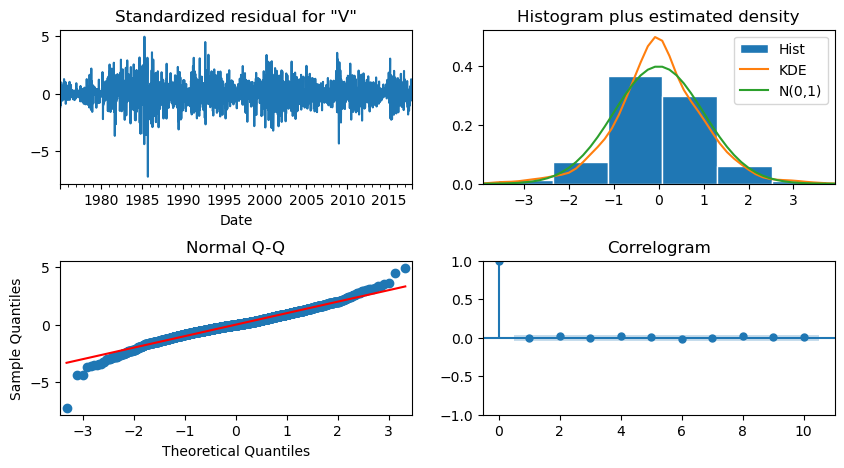

In [33]:
model = ARIMA(weekly_ex_rate_df['Value'], order=(0, 1, 1))
result = model.fit()

# Plot diagnostics
result.plot_diagnostics(figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

#### Forecasting values using the ARIMA model fitted to the entire resampled weekly dataset.

In [34]:
predictions = result.predict(typ = 'levels')

In [35]:
predictions

Date
1975-01-05    0.000000
1975-01-12    0.760900
1975-01-19    0.751555
1975-01-26    0.756530
1975-02-02    0.740396
                ...   
2017-10-15    0.851939
2017-10-22    0.844721
2017-10-29    0.848878
2017-11-05    0.854467
2017-11-12    0.860708
Freq: W-SUN, Name: predicted_mean, Length: 2237, dtype: float64

## Model Evaluation

#### Assessing the model's performance using various metrics, including R-squared percentage, mean squared error, root mean squared error, mean absolute error, and mean absolute percentage error, applied to both the predicted values and the entire dataset.

In [36]:
r2 = r2_score(weekly_ex_rate_df['Value'], predictions)
mse = mean_squared_error(weekly_ex_rate_df['Value'], predictions)
mae = mean_absolute_error(weekly_ex_rate_df['Value'], predictions)
rmse = sqrt(mse)
mape = 100 * mean_absolute_percentage_error(weekly_ex_rate_df['Value'], predictions)

# Print evaluation results
print('Evaluation Result for whole data:\n')
print('R2 Score for whole data: {0:f} %'.format(100 * r2))
print('Mean Squared Error: {:f}'.format(mse))
print('Mean Absolute Error: {:f}'.format(mae))
print('Root Mean Squared Error: {:f}'.format(rmse))
print('Mean Absolute Percentage Error: {:f} %'.format(mape))

Evaluation Result for whole data:

R2 Score for whole data: 98.463187 %
Mean Squared Error: 0.000361
Mean Absolute Error: 0.007797
Root Mean Squared Error: 0.018992
Mean Absolute Percentage Error: 0.893917 %


## Result

#### Combining the resampled weekly dataset, the dataframe with weekly first differences, and the predicted values. The columns are labeled as 'Foreign Exchange Rate (weekly)', 'Weekly First Difference', and 'Predicted Exchange Rate'. The resulting dataframe is exported to a CSV file. Additionally, the first five records of the exported dataframe are displayed.

In [37]:
final_data = pd.concat([weekly_ex_rate_df, week_df, pd.Series(predictions, index=week_df.index)], axis=1)
final_data.columns = ['Exchange Rate (weekly)', 'Weekly First Difference', 'Predicted Exchange Rate']

final_data.to_csv('Exchange Rate with Predictiaon (Euro To USD).csv')

final_data.head()

,Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
Date,,,
1975-01-05,0.76090,NaN,NaN
1975-01-12,0.75346,-0.00744,0.760900
1975-01-19,0.75546,0.00200,0.751555
1975-01-26,0.74388,-0.01158,0.756530
1975-02-02,0.73902,-0.00486,0.740396


## Model Testing

#### Splitting the resampled weekly dataset into training and test data subsets

In [38]:
weekly_ex_rate_df = weekly_ex_rate_df.sort_index()

size = int(len(weekly_ex_rate_df) * 0.80)

# Split the data into training and testing sets
train = weekly_ex_rate_df.iloc[:size]['Value']
test = weekly_ex_rate_df.iloc[size:]['Value']

print('Counts of Train Data:', train.shape[0])
print('Counts of Test Data:', test.shape[0])

Counts of Train Data: 1789
Counts of Test Data: 448


#### The ARIMA model is fitted to the train_values using the best parameters obtained from the auto_arima model. Predictions are made using the test data, and the results are appended to the predictions list. Finally, a comparison between the predicted and actual values is printed.

In [39]:
train = train.sort_index()
test = test.sort_index()

# Convert the training set to a list
train_values = train.tolist()

# Initialize the list to store predictions
predictions = []

# Iterate through the test set
for t in range(len(test)):
    # Fit an ARIMA model to the current training values
    model = ARIMA(train_values, order=(0, 1, 1))
    model_fit = model.fit()

    # Make a one-step forecast
    output = model_fit.forecast()
    pred_out = output[0]

    # Append the prediction to the list
    predictions.append(float(pred_out))

    # Update the training values with the actual test value
    test_in = test.iloc[t]
    train_values.append(test_in)

#### Evaluating the model's performance using metrics, including the R-squared percentage, mean squared error, root mean squared error, mean absolute error, and mean absolute percentage error, applied to both the predicted values and the test data.

In [40]:
test = test.sort_index()

# Calculate evaluation metrics
r2_test = r2_score(test, predictions)
mse_test = mean_squared_error(test, predictions)
mae_test = mean_absolute_error(test, predictions)
rmse_test = sqrt(mse_test)
mape_test = 100 * mean_absolute_percentage_error(test, predictions)

# Print evaluation results for the test data
print('Evaluation Result for Test data:\n')
print('R2 Score for Test data: {:f} %'.format(100 * r2_test))
print('Mean Squared Error: {:f}'.format(mse_test))
print('Mean Absolute Error: {:f}'.format(mae_test))
print('Root Mean Squared Error: {:f}'.format(rmse_test))
print('Mean Absolute Percentage Error: {:f} %'.format(mape_test))

Evaluation Result for Test data:

R2 Score for Test data: 98.956935 %
Mean Squared Error: 0.000067
Mean Absolute Error: 0.006431
Root Mean Squared Error: 0.008174
Mean Absolute Percentage Error: 0.806592 %


In [41]:
predictions_df = pd.Series(predictions, index = test.index)
predictions_df

Date
2009-04-19    0.752641
2009-04-26    0.761367
2009-05-03    0.768637
2009-05-10    0.754904
2009-05-17    0.744907
                ...   
2017-10-15    0.851940
2017-10-22    0.844721
2017-10-29    0.848877
2017-11-05    0.854467
2017-11-12    0.860708
Freq: W-SUN, Length: 448, dtype: float64

#### Creating a plot that depicts the predicted data alongside the index of the resampled weekly dataset, as the prediction is based on the test data.

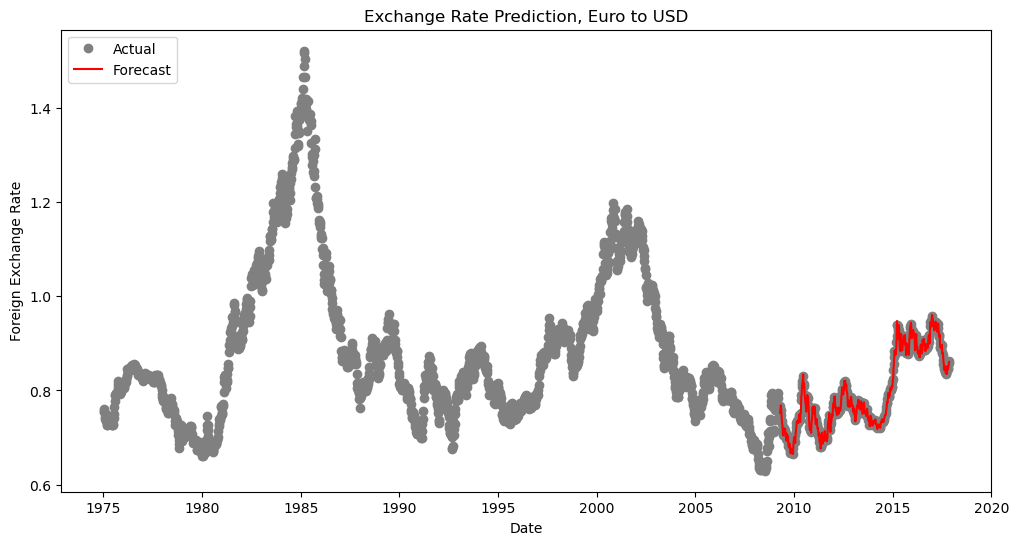

In [42]:
predictions_df = predictions_df.sort_index()

# Set the figure size
plt.rcParams['figure.figsize'] = (12, 6)

# Create a subplot
fig, ax = plt.subplots()

# Set plot properties
ax.set(title='Exchange Rate Prediction, Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')

ax.plot(weekly_ex_rate_df, 'o', label='Actual', color='grey')

ax.plot(predictions_df, 'r', label='Forecast')

# Add legend to the upper left
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

plt.savefig('Exchange Rate Prediction - Euro to USD.png')

plt.show()


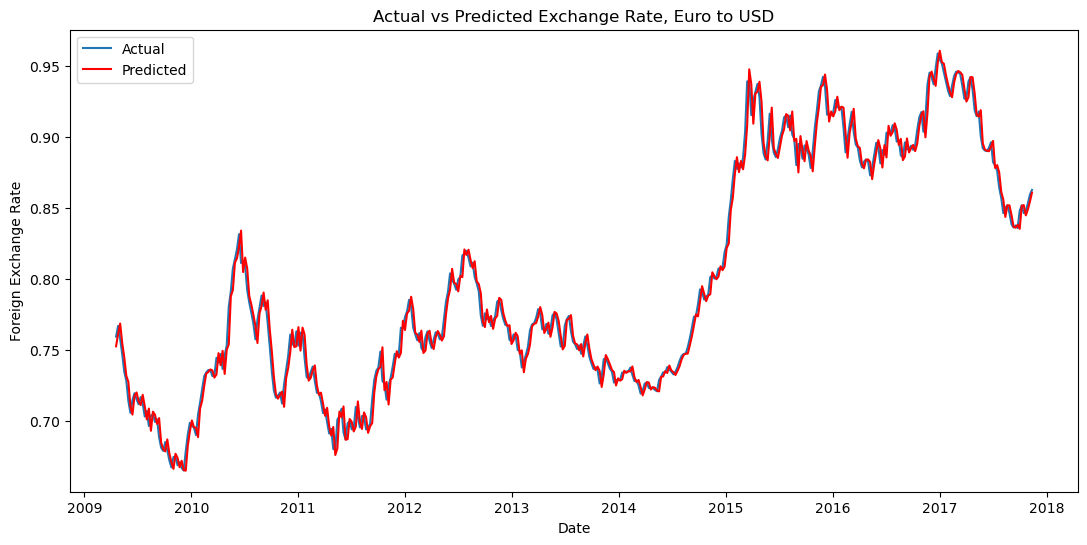

In [43]:
predictions_df = predictions_df.sort_index()

# Set the figure size
plt.rcParams['figure.figsize'] = (13, 6)

# Create a subplot
fig, ax = plt.subplots()

# Set plot properties
ax.set(title='Actual vs Predicted Exchange Rate, Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')

# Get the common time range for actual and predicted values
common_range = weekly_ex_rate_df.index.intersection(predictions_df.index)

# Plot the actual values as blue dots for the common range
ax.plot(common_range, weekly_ex_rate_df.loc[common_range, 'Value'],label='Actual')

# Plot the predicted values as red lines for the common range
ax.plot(common_range, predictions_df.loc[common_range], 'r', label='Predicted')

legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

plt.savefig('Plot Actual vs Predicted Foreign Exchange Rate - Euro to USD.png')

plt.show()

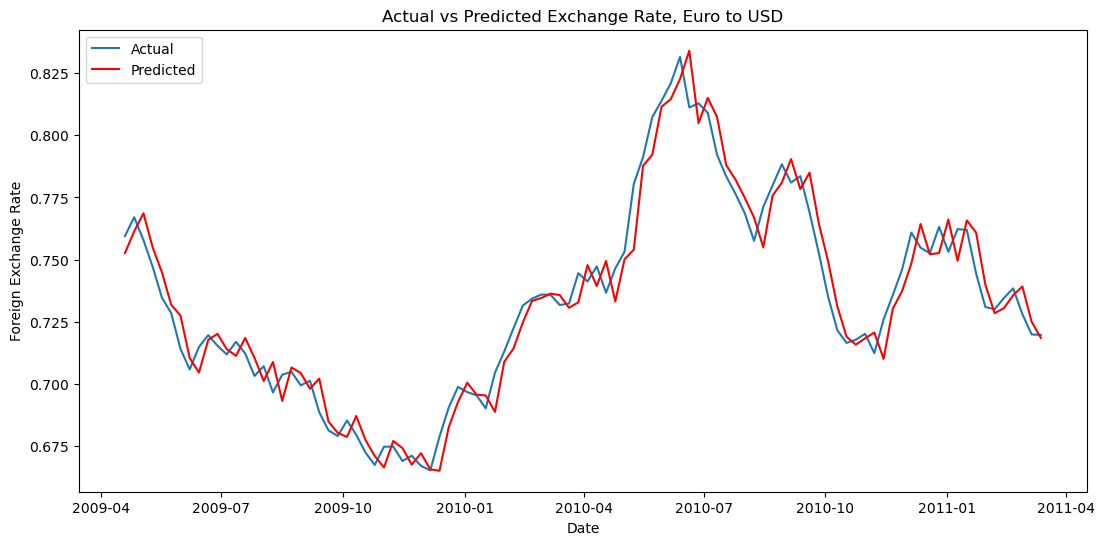

In [44]:
predictions_df = predictions_df.sort_index()

# Set the figure size
plt.rcParams['figure.figsize'] = (13, 6)

# Create a subplot
fig, ax = plt.subplots()

# Set plot properties
ax.set(title='Actual vs Predicted Exchange Rate, Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')

# Get the common time range for actual and predicted values
common_range = weekly_ex_rate_df.index.intersection(predictions_df.index[:100])
# common_range = weekly_ex_rate_df.index.intersection(predictions_df.index)

# Plot the actual values as blue dots for the common range
ax.plot(common_range, weekly_ex_rate_df.loc[common_range, 'Value'],label='Actual')

# Plot the predicted values as red lines for the common range
ax.plot(common_range, predictions_df.loc[common_range], 'r', label='Predicted')

legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

plt.savefig('Actual vs Predicted Foreign Exchange Rate - Euro to USD.png')

plt.show()
